In [ ]:
%matplotlib widget
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def eggholder_plot(x,y):
    #eggholder for minimization
    return -(y+47)*np.sin(np.sqrt(np.abs(y+x/2+47))) - x*np.sin(np.sqrt(np.abs(x-(y+47))))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
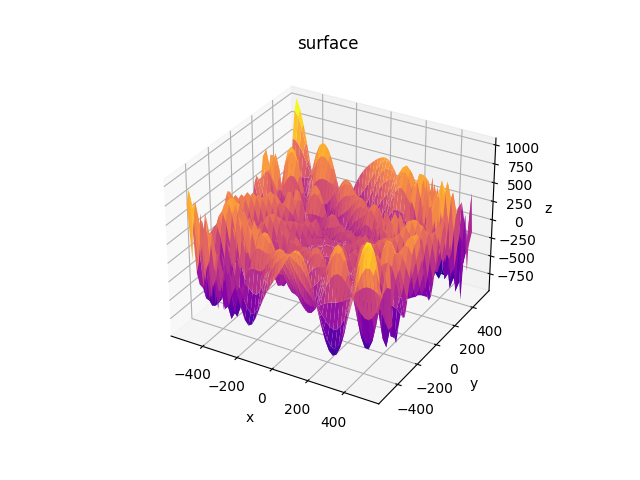

In [ ]:
x = np.linspace(-512, 512, 50)
y = np.linspace(-512, 512, 50)

X, Y = np.meshgrid(x, y)
Z = eggholder_plot(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='plasma', edgecolor='none')
ax.set_title('surface');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#ax.view_init(20, -90)
plt.show()

In [ ]:
def inv_drop_wave_plot(x,y):
    #inversed drop-wave for maximization 
    num = -(-12*x*np.sin(12*np.sqrt(x**2+y**2))*(0.5*(x**2+y**2)+2)-x*(1+np.cos(12*np.sqrt(x**2+y**2)))*np.sqrt(x**2+y**2))
    den = (((0.5*(x**2+y**2)+2)**2)*np.sqrt(x**2+y**2))
    return num/den

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
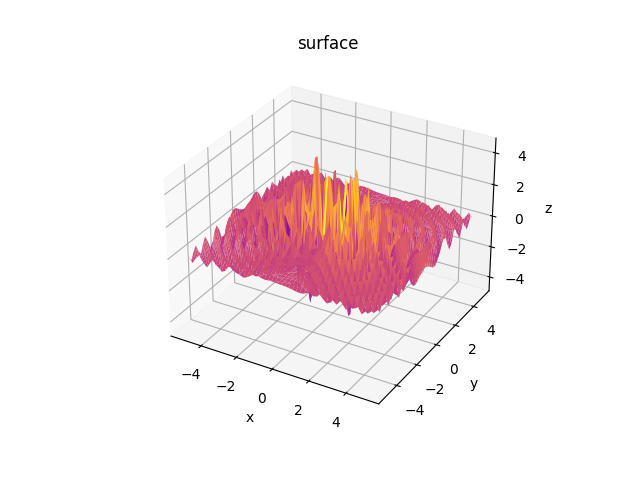

In [ ]:
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)

X, Y = np.meshgrid(x, y)
Z = inv_drop_wave_plot(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='plasma', edgecolor='none')
ax.set_title('surface');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#ax.view_init(20, -90)
plt.show()

In [ ]:
class particle:      
    
    def __init__(self, boundaries):
        
        self.current_position = []  # current particle position
        self.current_fit = 0  # fitness of the current particle position
        self.current_velocity = [0,0]  # particle velocity
        self.best_position = []  # best particle position
        self.best_fit = 0 # fitness of the best particle position
        self.boundaries = boundaries

        #for eggholder
        if self.boundaries == [(-512,512),(-512,512)]:
            
            for i in range(2): #range 2 beacuse the particle has 2 coordinates: x and y
                self.current_position.append(np.random.normal(0, 3.16))  # generate random initial position
                                            
        #for inversed drop-wave
        elif self.boundaries == [(-5,5),(-5,5)]:
            
            for i in range(2): #range 2 beacuse the particle has 2 coordinates: x and y
                
                #choose one of the limits of the boundaries with 0.5 of probability
                if random.uniform(0, 1) < 0.5:
                    self.current_position.append(random.uniform(-5, -4.5))
                else:
                    self.current_position.append(random.uniform(4.5, 5))
                        
    
    def velocity_update(self, best_overall_pos): 
        
        for i in range(2):  #update velocity for each coordinate
            
            r1 = random.uniform(0,1)
            r2 = random.uniform(0,1)

            inertia = random.uniform(0,1)
            cog_cons = random.uniform(0,4)
            soc_cons = random.uniform(0,4)

            cognitive_term = cog_cons * r1 * (self.best_position[i] - self.current_position[i])
            social_term = soc_cons * r2 * (best_overall_pos[i] - self.current_position[i])
            
            #formula to update the velocity
            self.current_velocity[i] = inertia * self.current_velocity[i] + cognitive_term + social_term  
        
                
    def position_update(self):
        
         for i in range(2):
            #vamos atualizar cada coordenada da particula
            self.current_position[i] = self.current_position[i] + self.current_velocity[i]

            # if the new coordinate is higher than the domain boundarie, change it to the limit allowed
            if self.current_position[i] > self.boundaries[i][1]:
                self.current_position[i] = self.boundaries[i][1]

            # if the new coordinate is smaller than the domain boundarie, change it to the limit allowed
            if self.current_position[i] < self.boundaries[i][0]:
                self.current_position[i] = self.boundaries[i][0]
        

In [15]:
class PSO:
    def __init__(self, prob_type, boundaries, particles, iterations):
        
        #parameters of arguments received
        self.prob_type = prob_type         #if maximization prob_type = 'maximization'
                                           #if minimization prob_type = 'minimization'
        self.boundaries = boundaries       # [-512,512] for eggholder and [-5,5] for inversed drop-wave
        self.particles = particles         #number of particles in the swarm
        self.iterations = iterations       #number of iterations of the algorithm
        
        #other paremeters
        self.best_overall_pos = []     #position of the best particle in the swarm
        self.best_overall_fit = 0      #fitness of the best particle in the swarm
        self.swarm = []                #vector with all the particles in the swarm
    
    def eggholder(self,x,y):
    #eggholder for minimization
        return -(y+47)*np.sin(np.sqrt(np.abs(y+x/2+47))) - x*np.sin(np.sqrt(np.abs(x-(y+47))))

    def inv_drop_wave(self, x,y):
    #inversed drop-wave for maximization 
        num = -(-12*x*np.sin(12*np.sqrt(x**2+y**2))*(0.5*(x**2+y**2)+2)-x*(1+np.cos(12*np.sqrt(x**2+y**2)))*np.sqrt(x**2+y**2))
        den = (((0.5*(x**2+y**2)+2)**2)*np.sqrt(x**2+y**2))
        return num/den

    def evaluate(self, particle): 
        
        #for eggholder
        if self.prob_type == 'minimization':           
            particle.current_fit = self.eggholder(particle.current_position[0], particle.current_position[1])
            
            #if the current position is the best (the lowes-minimization)
            #the best_position and the best_fit are going to be updated
            if particle.current_fit < particle.best_fit:             
                particle.best_fit = particle.current_fit
                particle.best_position = particle.current_position
            
            
        #for inversed drop-wave    
        elif self.prob_type == 'maximization':            
            particle.current_fit = self.inv_drop_wave(particle.current_position[0], particle.current_position[1])
            
            #if the current position is the best (the highest- maximization) 
            #the best_position and the best_fit are going to be updated
            if particle.current_fit > particle.best_fit:               
                particle.best_fit = particle.current_fit
                particle.best_position = particle.current_position
            
            
    def fit(self):
        
        #initialize the swarm
        for i in range(self.particles):
            self.swarm.append(particle(self.boundaries)) 
            #depending on the boundaries, the particle will use eggholder or inversed drop-wave

        # External loop - repeate [self.iterations] times
        for i in range(self.iterations):
                
            #internal loop - cycle through particles in the swarm and evaluate fitness
            for j in range(self.particles):
                
                #evaluate fitness of each particle
                self.evaluate(self.swarm[j])
                
                #for each particle, its best position will start by being the first position that it has
                if i == 0:
                    self.swarm[j].best_position = list(self.swarm[j].current_position)
                    self.swarm[j].best_fit = self.swarm[j].current_fit               
                
                    #the best particle will start by being the first particle of the swarm
                    if j==0:
                        self.best_overall_pos = list(self.swarm[j].current_position)      
                        self.best_overall_fit = self.swarm[j].current_fit
                
                
                #see if current particle is the best so far
                if self.prob_type == 'minimization':
                    if self.swarm[j].current_fit < self.best_overall_fit:
                        self.best_overall_pos = list(self.swarm[j].current_position)
                        self.best_overall_fit = self.swarm[j].current_fit
                        print('   iteration ', i+1, 'best particle update: ', self.best_overall_pos,'with fit: ' ,self.best_overall_fit )
                
                elif self.prob_type == 'maximization':
                    if self.swarm[j].current_fit > self.best_overall_fit:
                        self.best_overall_pos = list(self.swarm[j].current_position)
                        self.best_overall_fit = self.swarm[j].current_fit
                        #print('   iteration ', i+1, 'best particle update: ', self.best_overall_pos,'with fit: ' ,self.best_overall_fit )
                
            #print best particle at each iteration
            print('Interation: ', i+1, ' | Best particle position: ', self.best_overall_pos, ' | Best particle fitness: ', self.best_overall_fit)
            
            #update velocity and position for each particle
            for j in range(self.particles):
                self.swarm[j].velocity_update(self.best_overall_pos)
                self.swarm[j].position_update()

        
        #print the final solution
        print('Final solution position: ', self.best_overall_pos, ' | Final solution fitness: ', self.best_overall_fit)

In [16]:
pso = PSO('maximization', [(-5,5),(-5,5)], 500, 100)

In [17]:
pso.fit()

Final solution position:  [0.13028413622371088, 6.597538214655465e-10]  | Final solution fitness:  6.0070185702799614
